<a href="https://colab.research.google.com/github/UtkarshAIITB/IPL-Data-Analysis/blob/main/DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
new = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IPL Score_Analysis/CSV/new.csv')
# new.head()

In [45]:
t = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IPL Score_Analysis/CSV/t.csv')
# t.head()

In [46]:
t.drop(columns = ['Unnamed: 0'], inplace = True)
t.head()

,id,date,team1,team2,toss_winner,winner,inning,over,batting_team,bowling_team,year,field,D/L,eliminator?,total_runs_y,cum_total,cum_wicket
0,1175356,2019-03-23,12,5,12,12,1,0.1,5,12,2019,1,0,0,70,1,0
1,1175356,2019-03-23,12,5,12,12,1,0.2,5,12,2019,1,0,0,70,1,0
2,1175356,2019-03-23,12,5,12,12,1,0.3,5,12,2019,1,0,0,70,1,0
3,1175356,2019-03-23,12,5,12,12,1,0.4,5,12,2019,1,0,0,70,1,0
4,1175356,2019-03-23,12,5,12,12,1,0.5,5,12,2019,1,0,0,70,5,0


In [47]:
new.drop(columns = ['Unnamed: 0'], inplace = True)

In [48]:
new.head()

,id,date,team1,team2,toss_winner,winner,inning,over,batting_team,bowling_team,year,field,D/L,eliminator?,total_runs_y,cum_total,cum_wicket
0,335982,2008-04-18,5,9,5,9,1,0.1,9,5,2008,1,0,0,222,1,0
1,335982,2008-04-18,5,9,5,9,1,0.2,9,5,2008,1,0,0,222,1,0
2,335982,2008-04-18,5,9,5,9,1,0.3,9,5,2008,1,0,0,222,2,0
3,335982,2008-04-18,5,9,5,9,1,0.4,9,5,2008,1,0,0,222,2,0
4,335982,2008-04-18,5,9,5,9,1,0.5,9,5,2008,1,0,0,222,2,0


In [49]:
# new is the training set and t is the test set

In [50]:
tnew = t.drop(t[(t.over < 15.5) | (t.over >=15.6)].index)
tnew.reset_index(drop = True)
y1test = tnew['total_runs_y']
y2test = tnew['winner']
id_test = tnew['id'].reset_index(drop = True)
id_test = id_test.to_frame().reset_index(drop=True)
tnew.drop(columns = ['id', 'date', 'year', 'total_runs_y', 'winner'], inplace = True)
tnew.reset_index(drop=True).head()

,team1,team2,toss_winner,inning,over,batting_team,bowling_team,field,D/L,eliminator?,cum_total,cum_wicket
0,12,5,12,1,15.5,5,12,1,0,0,68,8
1,12,5,12,2,15.5,12,5,1,0,0,67,3
2,9,7,9,1,15.5,7,9,1,0,0,144,1
3,9,7,9,2,15.5,9,7,1,0,0,119,4
4,13,6,13,1,15.5,6,13,1,0,0,139,4


In [51]:
xnew = new.drop(new[(new.over < 15.5) | (new.over >=15.6)].index)
xnew.reset_index(drop = True)
y1train = xnew['total_runs_y']
y2train = xnew['winner']
xnew.drop(columns = ['id', 'date', 'year', 'total_runs_y', 'winner'], inplace = True)
xnew.reset_index(drop=True).head()

,team1,team2,toss_winner,inning,over,batting_team,bowling_team,field,D/L,eliminator?,cum_total,cum_wicket
0,5,9,5,1,15.5,9,5,1,0,0,158,2
1,8,12,12,1,15.5,12,8,0,0,0,168,5
2,8,12,12,2,15.5,8,12,0,0,0,174,3
3,6,11,11,1,15.5,11,6,0,0,0,104,7
4,13,5,13,1,15.5,13,5,0,0,0,110,4


In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [53]:
xnewt = sc.fit_transform(xnew) 
tnewt = sc.fit_transform(tnew)

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [55]:
model = Sequential()
# model.add(Dense(88, activation = 'relu'))
# model.add(Dropout(0.5))

model.add(Dense(50, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(25, activation = 'relu'))
# model.add(Dropout(0.5))

model.add(Dense(12, activation = 'relu'))
# model.add(Dropout(0.5))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [56]:
history= model.fit(x=xnewt, y=y1train, epochs=150, 
          validation_data=(tnewt,y1test))

Epoch 1/150
44/44 [==============================] - 2s 20ms/step - loss: 25733.0742 - val_loss: 27489.9668
Epoch 2/150
44/44 [==============================] - 0s 5ms/step - loss: 25211.4219 - val_loss: 26539.2949
Epoch 3/150
44/44 [==============================] - 0s 2ms/step - loss: 23222.4473 - val_loss: 22785.9492
Epoch 4/150
44/44 [==============================] - 0s 2ms/step - loss: 16689.4648 - val_loss: 11866.3330
Epoch 5/150
44/44 [==============================] - 0s 3ms/step - loss: 5682.5571 - val_loss: 1930.4049
Epoch 6/150
44/44 [==============================] - 0s 3ms/step - loss: 2515.5967 - val_loss: 1380.5181
Epoch 7/150
44/44 [==============================] - 0s 3ms/step - loss: 2124.4133 - val_loss: 1149.1488
Epoch 8/150
44/44 [==============================] - 0s 2ms/step - loss: 1936.5674 - val_loss: 1004.8688
Epoch 9/150
44/44 [==============================] - 0s 2ms/step - loss: 1782.5009 - val_loss: 941.9091
Epoch 10/150
44/44 [===========================

In [57]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


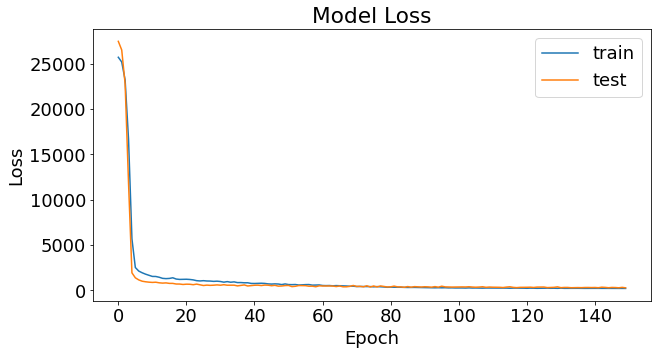

In [58]:
# plt.figure(figsize=(16,8))
plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size': 18})
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/IPL Score_Analysis/Plots/nn_model_score.png')
plt.show()

In [59]:
y1test = y1test.ravel()

In [60]:
predictions = model.predict(tnewt)
sample = pd.DataFrame(predictions,columns=['Predict'])
sample['Actual']=y1test
sample.head(10)

,Predict,Actual
0,112.151733,70
1,113.576126,71
2,184.260529,181
3,150.540665,183
4,176.211731,213
5,173.596069,176
6,182.875961,184
7,176.793091,170
8,159.304230,147
9,156.465134,150


In [61]:
def custom_accuracy(y_test,y_pred,thresold):
    right = 0
    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
    return ((right/l)*100)

In [62]:
custom_accuracy(sample['Actual'] , sample['Predict'],12)

54.310344827586206

In [63]:
# df.loc[len(df)] = your_array
# results.loc[len(results)] = res2
# df.append(pd.DataFrame(arr).T)
# results = results.append(pd.DataFrame(res2))
# results.append(pd.DataFrame(res3))

In [64]:
ar1 = sample['Actual'].unique()

In [65]:
results = pd.DataFrame()

In [66]:
for items in ar1:
  # print(items)
  try2 = sample[sample.Actual == items]
  result = (try2.sum())/try2.shape[0]
  # print(result)
  res = result.values.reshape(1,2)
  # print(res)
  results = results.append(pd.DataFrame(res))

In [67]:
results.head()

,0,1
0,112.151733,70.0
0,113.576126,71.0
0,173.558289,181.0
0,160.349899,183.0
0,178.992096,213.0


In [68]:
# rankings_pd.rename(columns = {'test':'TEST'}, inplace = True)
results.rename(columns = {0: 'Predict',
                          1: 'Actual'
                          }, inplace = True)

In [69]:
results.reset_index(drop = True)

,Predict,Actual
0,112.151733,70.0
1,113.576126,71.0
2,173.558289,181.0
3,160.349899,183.0
4,178.992096,213.0
...,...,...
67,113.904907,115.0
68,143.374466,121.0
69,163.273788,134.0
70,147.359680,165.0


In [70]:
results.tail()

,Predict,Actual
0,113.904907,115.0
0,143.374466,121.0
0,163.273788,134.0
0,147.359680,165.0
0,142.899719,148.0


In [71]:
print(custom_accuracy(results['Actual'].ravel(),results['Predict'].ravel(),12))

55.55555555555556


In [72]:
# results.info()

In [73]:
# results['Actual']

In [74]:
tests = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IPL Score_Analysis/CSV/testset.csv')
# tests.head()
tests.drop(columns = ['Unnamed: 0'], inplace = True)
tests.head()

,id,date,team1,team2,toss_winner,winner,inning,over,batting_team,bowling_team,field,D/L,eliminator?,total_runs_y,cum_total,cum_wicket
0,1254058,2021-04-09,12,5,5,5,1,0.1,12,5,1,0,0,159,2,0
1,1254058,2021-04-09,12,5,5,5,1,0.2,12,5,1,0,0,159,2,0
2,1254058,2021-04-09,12,5,5,5,1,0.3,12,5,1,0,0,159,2,0
3,1254058,2021-04-09,12,5,5,5,1,0.4,12,5,1,0,0,159,4,0
4,1254058,2021-04-09,12,5,5,5,1,0.5,12,5,1,0,0,159,4,0


In [75]:
sets = tests.drop(tests[(tests.over < 15.5) | (tests.over >=15.6)].index)
sets.reset_index(drop = True)
yt1 = sets['total_runs_y']
yt2 = sets['winner']
tt_2021 = tests['id'].reset_index(drop = True)
tt_2021 = tt_2021.to_frame().reset_index(drop = True)
sets.drop(columns = ['id', 'date', 'total_runs_y', 'winner'], inplace = True)
sets.reset_index(drop=True).head()

,team1,team2,toss_winner,inning,over,batting_team,bowling_team,field,D/L,eliminator?,cum_total,cum_wicket
0,12,5,5,1,15.5,12,5,1,0,0,135,3
1,12,5,5,2,15.5,5,12,1,0,0,120,5
2,11,6,6,1,15.5,11,6,1,0,0,142,6
3,11,6,6,2,15.5,6,11,1,0,0,157,1
4,9,7,7,1,15.5,9,7,1,0,0,151,2


In [76]:
yt1 = yt1.ravel()

In [77]:
xs = sc.fit_transform(sets)

In [78]:
predictions = model.predict(xs)
sample = pd.DataFrame(predictions,columns=['Predict'])
sample['Actual']=yt1
sample.head(10)

,Predict,Actual
0,177.870148,159
1,153.768829,160
2,179.049789,188
3,184.112167,190
4,188.024231,187
5,159.100998,177
6,200.937363,221
7,193.739304,217
8,162.957672,152
9,155.322113,142


In [79]:
ar1 = sample['Actual'].unique()
results = pd.DataFrame()
for items in ar1:
  # print(items)
  try2 = sample[sample.Actual == items]
  result = (try2.sum())/try2.shape[0]
  # print(result)
  res = result.values.reshape(1,2)
  # print(res)
  results = results.append(pd.DataFrame(res))

In [80]:
results.rename(columns = {0: 'Predict',
                          1: 'Actual'
                          }, inplace = True)
results.reset_index(drop = True)
print(custom_accuracy(results['Actual'].ravel(),results['Predict'].ravel(),12))

55.88235294117647


In [81]:
model = Sequential()
# model.add(Dense(88, activation = 'relu'))
# model.add(Dropout(0.5))

model.add(Dense(100, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(50, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(25, activation = 'relu'))
# model.add(Dropout(0.5))

model.add(Dense(14, activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='sgd', metrics = ['accuracy'])

In [82]:
win_pred = model.fit(x=xnewt, y=y2train, epochs=400, 
          validation_data=(tnewt,y2test))

Epoch 1/400
44/44 [==============================] - 1s 6ms/step - loss: 2.7025 - accuracy: 0.0634 - val_loss: 2.5632 - val_accuracy: 0.1293
Epoch 2/400
44/44 [==============================] - 0s 2ms/step - loss: 2.6085 - accuracy: 0.0976 - val_loss: 2.4961 - val_accuracy: 0.1466
Epoch 3/400
44/44 [==============================] - 0s 3ms/step - loss: 2.5415 - accuracy: 0.1226 - val_loss: 2.4409 - val_accuracy: 0.1897
Epoch 4/400
44/44 [==============================] - 0s 2ms/step - loss: 2.4977 - accuracy: 0.1433 - val_loss: 2.3876 - val_accuracy: 0.2241
Epoch 5/400
44/44 [==============================] - 0s 2ms/step - loss: 2.4680 - accuracy: 0.1397 - val_loss: 2.3381 - val_accuracy: 0.2328
Epoch 6/400
44/44 [==============================] - 0s 3ms/step - loss: 2.4343 - accuracy: 0.1639 - val_loss: 2.2930 - val_accuracy: 0.2328
Epoch 7/400
44/44 [==============================] - 0s 3ms/step - loss: 2.4020 - accuracy: 0.1561 - val_loss: 2.2522 - val_accuracy: 0.2414
Epoch 8/400
4

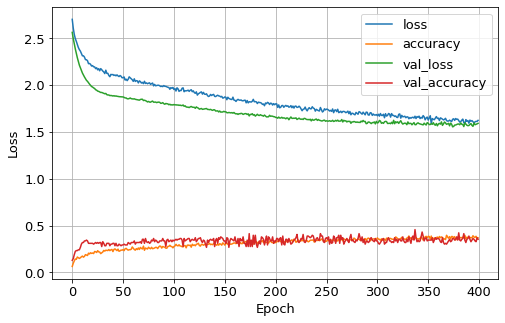

In [101]:
pd.DataFrame(win_pred.history).plot(figsize = (8,5))
# plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size': 15})
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.grid(True)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/IPL Score_Analysis/Plots/nn_winner_pred.png')
plt.show()

In [84]:
y2test = y2test.ravel()

In [85]:
predictions = model.predict(tnewt)
class_pred = np.argmax(predictions, axis=1)
class_pred
# sample = pd.DataFrame(predictions,columns=['Predict'])
# sample['Actual']=y2test
# sample.head(10)

array([12, 12,  6,  8, 13, 12,  9, 11, 12, 12,  9,  9, 13, 13, 11, 11, 13,
        6,  5,  5,  5,  5, 11, 11,  5,  5, 11, 11, 12, 12,  5,  5,  5,  5,
       11, 11,  5, 13,  5,  5,  9,  8,  7, 12, 11,  8, 13, 11, 11,  5,  5,
       12, 11,  5,  5, 12, 11,  5,  5,  5, 12,  8, 11, 11,  5, 13, 13,  5,
        8, 11, 11,  5,  5,  7, 12,  5, 11,  5,  6, 12,  5,  5,  9,  9, 12,
       12, 11, 11,  5,  5,  8, 13,  6,  7, 12, 13, 11, 12,  9,  8,  5, 11,
        5,  5, 12,  6, 13, 13, 12, 12,  5,  5, 12, 12, 12, 12])

In [86]:
# predictions

In [87]:
# proba = predictions.round(2)
# proba

In [88]:
sample = pd.DataFrame(class_pred,columns=['Predict'])
sample['Actual']=y2test
# sample.head()

In [89]:
frames = [id_test, sample]
final = pd.concat(frames, axis = 1)
# final.head()
ar1 = final['id'].unique()
winner = pd.DataFrame()
for items in ar1:
  # print(items)
  try2 = final[final.id == items]
  # try2.drop(columns = 'id', inplace = True)
  hapi = try2.drop(columns = ['id']).reset_index(drop=True)
  result = (hapi.sum())/hapi.shape[0]
  # print(result)
  res = result.values.reshape(1,2)
  # print(res)
  winner = winner.append(pd.DataFrame(res))
  
winner.rename(columns = {0: 'Predict',
                          1: 'Actual'
                          }, inplace = True)
winner.reset_index(drop = True)

winner['diff'] = abs(winner['Actual'] - winner['Predict'])
to = winner.shape[0]
print( ((winner[(winner['diff'])<1].shape[0])/to)*100 )

37.28813559322034


In [90]:
# final.to_csv('final.csv')

In [91]:
test_pred = model.predict(xs)
class_pred = np.argmax(test_pred, axis=1)
sample = pd.DataFrame(class_pred,columns=['Predict'])
yt2 = yt2.ravel()
sample['Actual']=yt2

In [92]:
frames = [tt_2021, sample]
final = pd.concat(frames, axis = 1)
# final.head()
ar1 = final['id'].unique()
winner = pd.DataFrame()
for items in ar1:
  # print(items)
  try2 = final[final.id == items]
  # try2.drop(columns = 'id', inplace = True)
  hapi = try2.drop(columns = ['id']).reset_index(drop=True)
  result = (hapi.sum())/hapi.shape[0]
  # print(result)
  res = result.values.reshape(1,2)
  # print(res)
  winner = winner.append(pd.DataFrame(res))
  
winner.rename(columns = {0: 'Predict',
                          1: 'Actual'
                          }, inplace = True)
winner.reset_index(drop = True)

winner['diff'] = abs(winner['Actual'] - winner['Predict'])
to = winner.shape[0]
print( ((winner[(winner['diff'])<1].shape[0])/to)*100 )

100.0


In [93]:
winner.shape

(21, 3)